<a href="https://colab.research.google.com/github/Hetal-byte/Heta2-2/blob/main/Assignment28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load the dataset
file_path = "/content/Day_28_Clustering_Dataset.csv"
df = pd.read_csv(file_path)

# Display basic information and the first five rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_1  100 non-null    float64
 1   Feature_2  100 non-null    float64
 2   Cluster    100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


(None,
    Feature_1  Feature_2  Cluster
 0  -7.726421  -8.394957        2
 1   5.453396   0.742305        1
 2  -2.978672   9.556846        0
 3   6.042673   0.571319        1
 4  -6.521840  -6.319325        2)

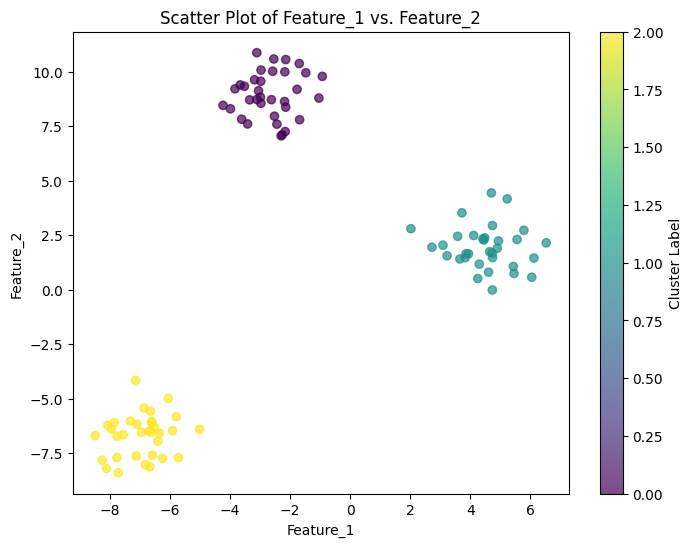

In [3]:
import matplotlib.pyplot as plt

# Scatter plot of Feature_1 vs. Feature_2
plt.figure(figsize=(8, 6))
plt.scatter(df["Feature_1"], df["Feature_2"], c=df["Cluster"], cmap="viridis", alpha=0.7)
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.title("Scatter Plot of Feature_1 vs. Feature_2")
plt.colorbar(label="Cluster Label")
plt.show()


In [4]:
# Compute mean, median, and variance for each feature
statistics = df[["Feature_1", "Feature_2"]].agg(["mean", "median", "var"])
statistics


,Feature_1,Feature_2
mean,-1.716279,1.474851
median,-2.603027,1.922690
var,23.081054,42.317376


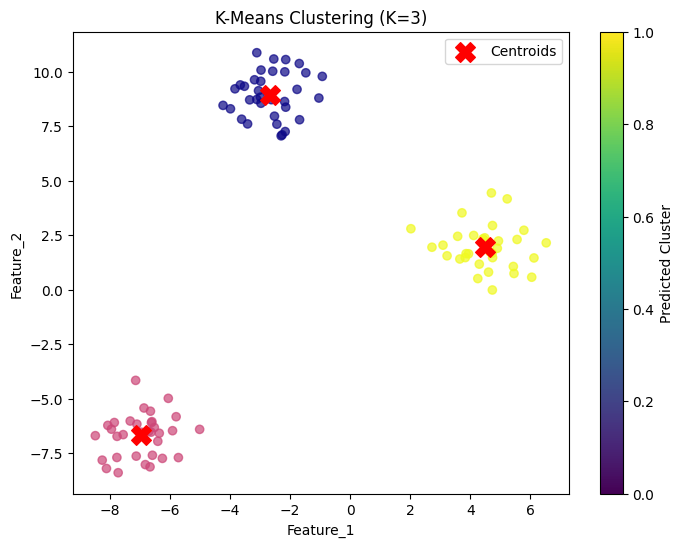

In [5]:
from sklearn.cluster import KMeans
import numpy as np

# Apply K-Means clustering with K=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Predicted_Cluster"] = kmeans.fit_predict(df[["Feature_1", "Feature_2"]])

# Plot the clustered data points
plt.figure(figsize=(8, 6))
plt.scatter(df["Feature_1"], df["Feature_2"], c=df["Predicted_Cluster"], cmap="plasma", alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="red", marker="X", label="Centroids")
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.title("K-Means Clustering (K=3)")
plt.legend()
plt.colorbar(label="Predicted Cluster")
plt.show()


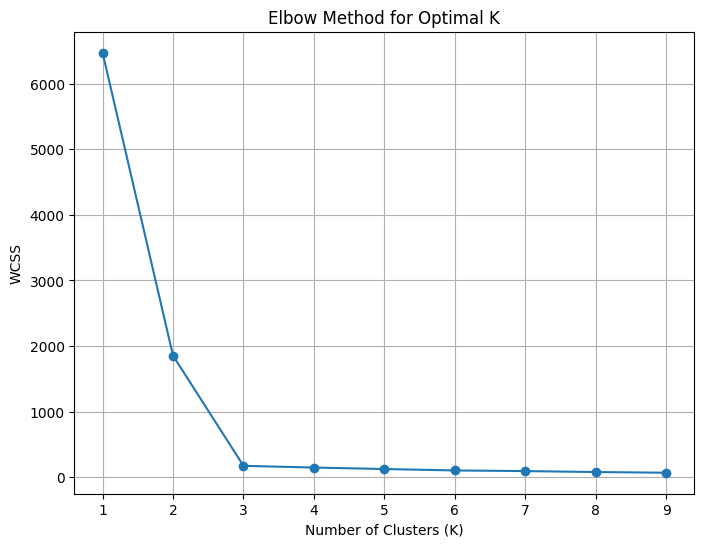

In [6]:
# Compute WCSS for different values of K
wcss = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df[["Feature_1", "Feature_2"]])
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker="o", linestyle="-")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.xticks(k_values)
plt.grid()
plt.show()


In [7]:
from sklearn.metrics import adjusted_rand_score

# Compute Adjusted Rand Index (ARI) to evaluate clustering performance
ari_score = adjusted_rand_score(df["Cluster"], df["Predicted_Cluster"])
ari_score


1.0